Efeito-Fotoeletrico
# [link text](https://)

## Lab Efeito Fotoelectrico
![](https://drive.google.com/uc?export=view&id=1n3Hqb9uN1VjAjlRTn1j8wTrpMMGEKGvG).  


$e \cdot V_s = K_{e,max} = h \nu - W$,   

$ e = 1.6 \cdot 10^{-19} C$.  

$ c = 3.0 \cdot 10^{8} m s^{-1}$.  

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# String descritivo das unidates do Cesp
#UNITCesp = 'kJ kg\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}ºC\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}'
# Constantes
C = 3.0e8 # (m/s) Velocidade da Luz
E = 1.9e-19 # (C) carga do eletrão
plt.close("all")

In [3]:
# @title Valores Tabelados das riscas principais do Mercúrio
# Cor: amarela, verde , azul , violeta , ultra-violeta
cdo = np.array([578, 546, 436, 405, 365]) * 1e-9
freq = C / cdo

Text(0.5, 1.0, 'Tensao de Paragem')

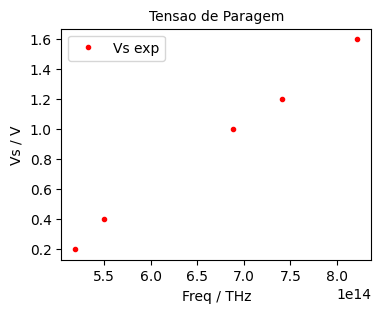

In [8]:
# @title Valores Experimentais e Gráfico
Vs =  np.array([0.20, 0.40, 1.00, 1.20, 1.60])
fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(freq, Vs, '.', color='red', label='Vs exp')
#plt.plot(x, y2, '-', color='blue', label='T2 (água)')
plt.legend(loc='best')
plt.xlabel('Freq / THz')
plt.ylabel('Vs / V')
plt.title("Tensao de Paragem", fontsize=10)

Text(0.5, 1.0, 'Tensao de Paragem')

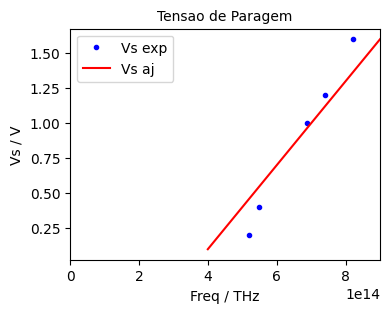

In [20]:
# @title Ajuste Manual
#m1 = 0.050 # @param {type:"number"}
m = 3.0e-15 # @param {type:"slider", min:1e-15, max:6e-15, step:1e-17}
wo = -1.1 # @param {type:"slider", min:-2, max:0, step:0.1}

flimit= np.array([4, 9]) * 1e14
# flimit= freq[np.array([0, -1])]
Vs_aj = m * flimit + wo
fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(freq, Vs, '.', color='blue', label='Vs exp')
plt.plot(flimit, Vs_aj, '-', color='red', label='Vs aj')
#plt.plot(x, y2, '-', color='blue', label='T2 (água)')
plt.legend(loc='best')
plt.xlabel('Freq / THz')
plt.ylabel('Vs / V')
axes = plt.gca()
axes.set_xlim([0, 9.0e14])
plt.title("Tensao de Paragem", fontsize=10)


Text(0.5, 1.0, 'Tensao de Paragem, Ajuste')

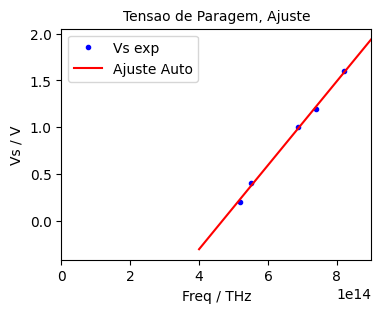

In [38]:
# @title Ajuste Automático
# Ref: Ifan Hughes, Thomas Hase "Measurements and their uncertainties", Pag 64
def ajuste_FE(f, V):
  N = len(f)
  Delta = N *  np.square(f).sum() -  f.sum()**2
  m = (N * (f*V).sum() - f.sum() * V.sum()) / Delta
  c = ( np.square(f).sum() * V.sum() - f.sum() * (f*V).sum() ) / Delta
  return m, c


m_aj, c_aj = ajuste_FE(freq, Vs)
flimit= np.array([4, 9]) * 1e14
# flimit= freq[np.array([0, -1])]
Vs_aj = m_aj * flimit + c_aj
fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(freq, Vs, '.', color='blue', label='Vs exp')
plt.plot(flimit, Vs_aj, '-', color='red', label='Ajuste Auto')
plt.legend(loc='best')
plt.xlabel('Freq / THz')
plt.ylabel('Vs / V')
axes = plt.gca()
axes.set_xlim([0, 9.0e14])
plt.title("Tensao de Paragem, Ajuste", fontsize=10)


In [ ]:
# Extrair dados do folha Google
dados = pd.read_csv('https://docs.google.com/spreadsheets/d/' +
                   '1AmR_CdLTG81rect1AdZcbiK3s8E891Y73aEu_8Jf0ko' +
                   '/export?format=csv',
                   header=1)
                    #header=[0, 1])

In [ ]:
Banc = 'B'
massaCal = dados.loc[dados['Bancada'] == Banc,'Massa do Calorímetro (vazio) em gramas']
massaCalH2O = dados.loc[dados['Bancada'] == Banc,'Massa do Calorímetro com a água (gramas)']
massaCalH2OCu = dados.loc[dados['Bancada'] == Banc,'Massa do Calorímetro com a água e o cobre misturados (gramas)']
tempH2O = dados.loc[dados['Bancada'] == Banc,'Temperatura da água antes da mistura em ºC']
tempCu = dados.loc[dados['Bancada'] == Banc,'Temperatura do cobre aquecido (antes da mistura) em ºC']
tempFinal = dados.loc[dados['Bancada'] == Banc,'Temperatura final da mistura em ºC']

In [ ]:
massaH2O = massaCalH2O - massaCal
massaCu = massaCalH2OCu - massaCalH2O
Nensaios = dados['Bancada'].count()

In [ ]:
C2 = CespDf.iloc[0, 1]
meq = 0.024
# Cáculo do
Ccu=Cesp(C2, massaCu, massaH2O, meq, tempCu, tempH2O, tempFinal)
CcuB=Ccu[Ccu> 0.1]

In [ ]:
print(f'Calor específico medio do Cu é {CcuB.mean():.3f} {UNITCesp}')
print(f'DP do Calor específico Cu é {CcuB.std():.3f} {UNITCesp}')
print(f'Erro da média do Calor específico Cu é {CcuB.std()/np.sqrt(Nensaios):.3f} {UNITCesp}')

Calor específico medio do Cu é 0.402 kJ kg⁻¹ºC⁻¹
DP do Calor específico Cu é 0.083 kJ kg⁻¹ºC⁻¹
Erro da média do Calor específico Cu é 0.005 kJ kg⁻¹ºC⁻¹


<Axes: >

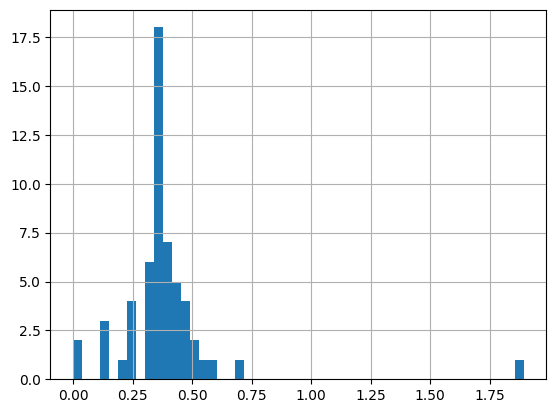

In [ ]:

Ccu.hist(bins=50)